In [4]:
import boto3
import pandas as pd
import pyarrow.parquet as pq
import s3fs

In [5]:
!pip install --upgrade s3fs

In [4]:
!pip install "s3fs>=2022.1.0"

In [6]:
# Load parquet file directly from S3
s3_path = 's3://raw-data-bitcoin/bitcoin_cleaned_data/20250316_033643_00015_zb83s_8e7bb85c-14bb-4651-90fb-6c419f922ba1'

# Read the parquet file
df = pd.read_parquet(s3_path, engine='pyarrow')

# Display first few rows
print(df.head())

                 date      open      high       low     close     volume
0 2021-01-07 17:49:00  39561.22  39561.23  39525.45  39551.56  32.372589
1 2021-01-07 17:50:00  39551.56  39555.89  39482.05  39498.36  43.793211
2 2021-01-07 17:51:00  39498.36  39634.00  39490.44  39627.96  72.359485
3 2021-01-07 17:52:00  39627.94  39641.44  39582.69  39599.99  57.512660
4 2021-01-07 17:53:00  39600.00  39623.45  39560.21  39561.22  39.779550


In [7]:
print(df.shape)

(1000000, 6)


In [8]:
print(df.dtypes)

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object


In [22]:
print(df.describe())

                 open            high             low           close  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean     38831.434267    38857.843997    38805.171742    38831.419186   
std      13352.984933    13361.010538    13344.668469    13353.001821   
min      15513.840000    15544.470000    15476.000000    15513.840000   
25%      29129.642500    29145.980000    29111.000000    29129.610000   
50%      39295.390000    39325.000000    39264.020000    39295.315000   
75%      48323.797500    48356.382500    48291.520000    48324.052500   
max      69000.000000    69000.000000    68786.700000    69000.000000   

               volume   volume_scaled  
count  1000000.000000  1000000.000000  
mean        72.229779        0.000072  
std        110.952187        0.000111  
min          0.000000        0.000000  
25%         18.393755        0.000018  
50%         36.426851        0.000036  
75%         81.161105        0.000081  
max       4448.796350 

In [10]:
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

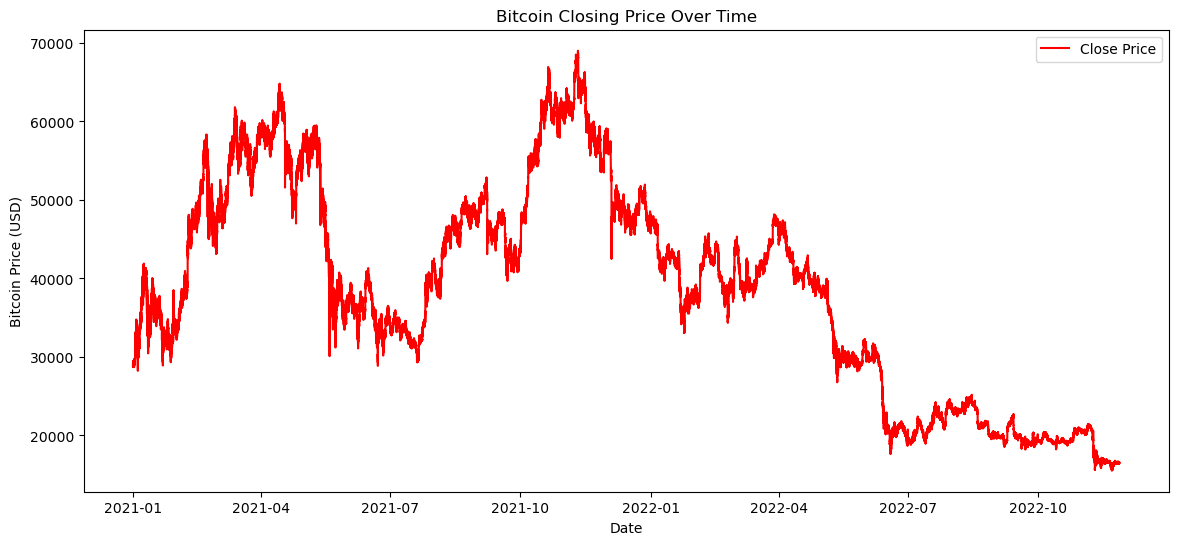

In [12]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='close', data=df, label='Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Closing Price Over Time')
plt.legend()
plt.show()

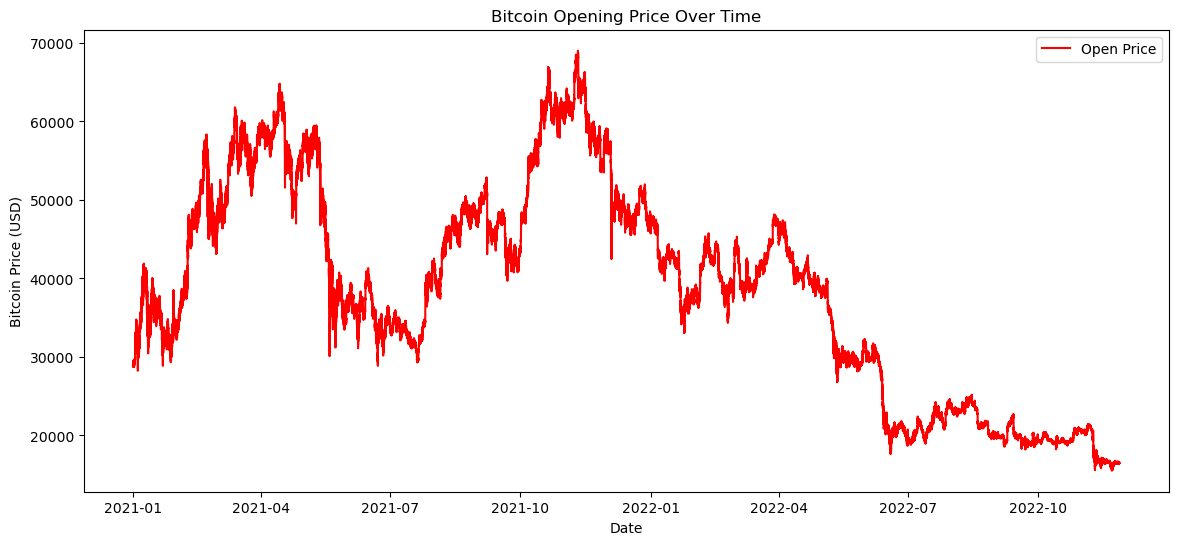

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='open', data=df, label='Open Price', color='red')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Opening Price Over Time')
plt.legend()
plt.show()

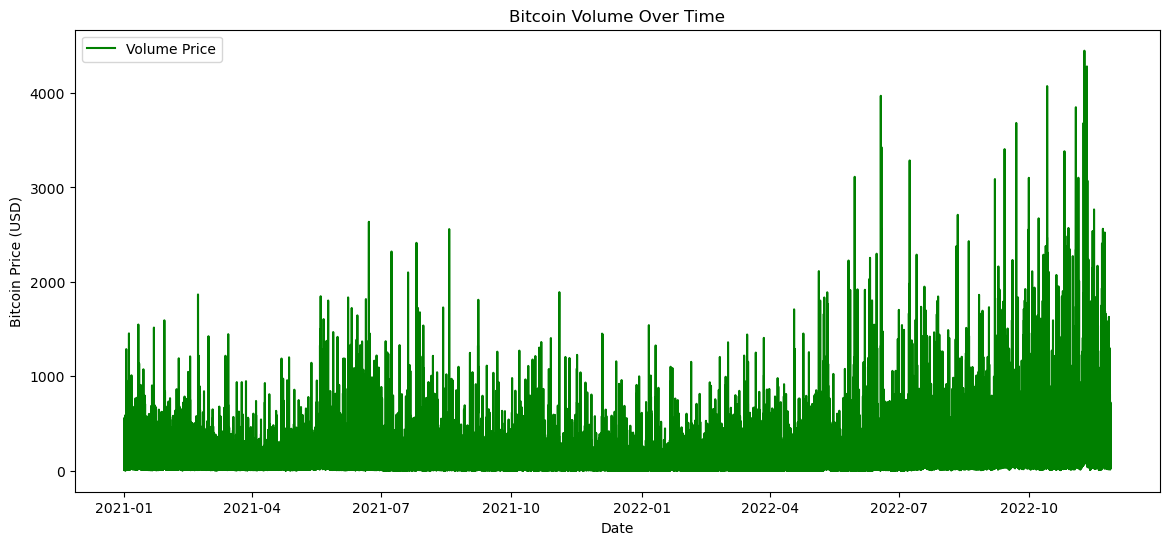

In [16]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='volume', data=df, label='Volume Price', color='green')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Bitcoin Volume Over Time')
plt.legend()
plt.show()